<a href="https://colab.research.google.com/github/KunalDM1999/LLM-and-Other-PTOJECTS/blob/main/priject1TDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **both Question's solutions  are in this same sheet **
**data extraction**

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
# Base URL
url = "https://22f3001919.github.io/tds_project_1/"

# Function to get the HTML content of a page
def get_page_content(page_url):
    response = requests.get(page_url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to retrieve {page_url}")
        return None

# Function to extract data from the HTML content
def extract_data_from_page(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    script_tag = soup.find('script', {'type': 'module'})

    if script_tag:
        script_content = script_tag.string
    else:
        print("No script tag found")
        return None, None

    # Extract the JSON data from the script content
    try:
        data_prefix = 'const data = '
        next_prefix = 'const next = '
        data_start = script_content.find(data_prefix) + len(data_prefix)
        data_end = script_content.find(';', data_start)
        data_json = script_content[data_start:data_end].strip()

        next_start = script_content.find(next_prefix) + len(next_prefix)
        next_end = script_content.find(';', next_start)
        next_page = script_content[next_start:next_end].strip().strip('"')

        return json.loads(data_json), next_page
    except json.JSONDecodeError as e:
        print(f"JSON decoding error: {e}")
        return None, None
    except Exception as e:
        print(f"Error while extracting data: {e}")
        return None, None

# Function to get all data pages
def get_all_data_pages(start_url):
    data = []
    current_url = start_url

    while current_url:
        html_content = get_page_content(current_url)
        if html_content:
            page_data, next_page = extract_data_from_page(html_content)
            if page_data:
                data.extend(page_data)
                current_url = url + next_page if next_page else None
            else:
                break
        else:
            break

    return data

# Function to filter data by state name
def filter_data_by_state(data, state_name):
    return [item for item in data if item['ST_NAME'] == state_name]

# Main function
def main():
    start_url = url + "index.html"
    all_data = get_all_data_pages(start_url)
    himachal_data = filter_data_by_state(all_data, "HIMACHAL PRADESH")

    # Print the filtered data
    for item in himachal_data:
        print(item)

if __name__ == "__main__":
    main()


Failed to retrieve https://22f3001919.github.io/tds_project_1/null
{'YEAR': 1951, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'ROnZoGPo'}
{'YEAR': 1967, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'MrkYIuKb'}
{'YEAR': 1972, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'iy8FeVWW'}
{'YEAR': 1977, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'JRnTYVvK'}
{'YEAR': 1982, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'M3gZGwCa'}
{'YEAR': 1985, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'nOOE7Dt0'}
{'YEAR': 1990, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'qLRYWxdc'}
{'YEAR': 1993, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'T7vBSOqP'}
{'YEAR': 1998, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'swHTjbMb'}
{'YEAR': 2003, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'cnOed8A3'}
{'YEAR': 2007, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'nAwku9Ux'}
{'YEAR': 2012, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'zqGTQCc5'}
{'YEAR': 2017, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'zyai1FTj'}
{'YEAR': 2022, 'ST_NAME': 'HIMACHAL PRADESH', 'link': 'u0YpbYkW'}


In [ ]:
from ast import Str
from urllib.request import urlopen
from bs4 import BeautifulSoup
import json
import pandas as pd

# Base URL and list of suffixes
base_url = 'https://22f3001919.github.io/tds_project_1/'
suffixes = ['ROnZoGPo', 'MrkYIuKb', 'iy8FeVWW', 'JRnTYVvK', 'M3gZGwCa',
            'nOOE7Dt0', 'qLRYWxdc', 'T7vBSOqP', 'swHTjbMb', 'cnOed8A3',
            'nAwku9Ux', 'zqGTQCc5', 'zyai1FTj', 'u0YpbYkW']


dfs = []

# Loop through each suffix
for suffix in suffixes:
    # Construct the full URL
    url = f'{base_url}{suffix}.html'

    # Fetch the content from the URL
    x = urlopen(url)

    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(x.read(), 'html.parser')

    # Find the script tag and extract its content
    script_tag = soup.find('script', type='module')
    script_content = script_tag.string

    # Extract the JSON data from the script content
    data_start = script_content.find('const data = ') + len('const data = ')
    data_end = script_content.find('];', data_start) + 1
    json_data = script_content[data_start:data_end].strip()

    # Convert the JSON data to a Python list
    data = json.loads(json_data)

    # Convert JSON data to pandas DataFrame
    df = pd.DataFrame(data)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
combined_df

# Extract numeric part (integer) from column 'AC'
combined_df['AC']= combined_df['AC'].str.replace(r'^\d+\s+', '', regex=True)

# Display the modified DataFrame
combined_df

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES
0,130287,HIMACHAL PRADESH,1951,SOLAN,1 HIRA SINGH PAL,M,None,None,IND,3707.0
1,130288,HIMACHAL PRADESH,1951,SOLAN,2 CHINTA MANI,M,None,None,IND,3132.0
2,130289,HIMACHAL PRADESH,1951,SOLAN,3 RAM DASS,M,None,None,SCF,3092.0
3,130290,HIMACHAL PRADESH,1951,SOLAN,4 KESHAV RAM,M,None,None,INC,2837.0
4,130291,HIMACHAL PRADESH,1951,SOLAN,5 HARI DASS,M,None,None,INC,2821.0
...,...,...,...,...,...,...,...,...,...,...
5183,135470,HIMACHAL PRADESH,2022,KINNAUR,2 SURAT NEGI,M,50.0,ST,BJP,13732.0
5184,135471,HIMACHAL PRADESH,2022,KINNAUR,3 TEJWANT SINGH NEGI,M,61.0,ST,IND,8574.0
5185,135472,HIMACHAL PRADESH,2022,KINNAUR,4 TERSEM SINGH,M,38.0,ST,AAAP,580.0
5186,135473,HIMACHAL PRADESH,2022,KINNAUR,5 ANIL KAPOOR,M,34.0,ST,BSP,280.0


# **Q1**
For the given state, Use Box-Whiskers plot / violin plot to display the outliers in candidate votes for each election year. Use a different colour to clearly highlight the outliers. Do not consider candidates with NaN/null/None/blank votes. 0 votes is a valid vote count. NOTA is a valid candidate.

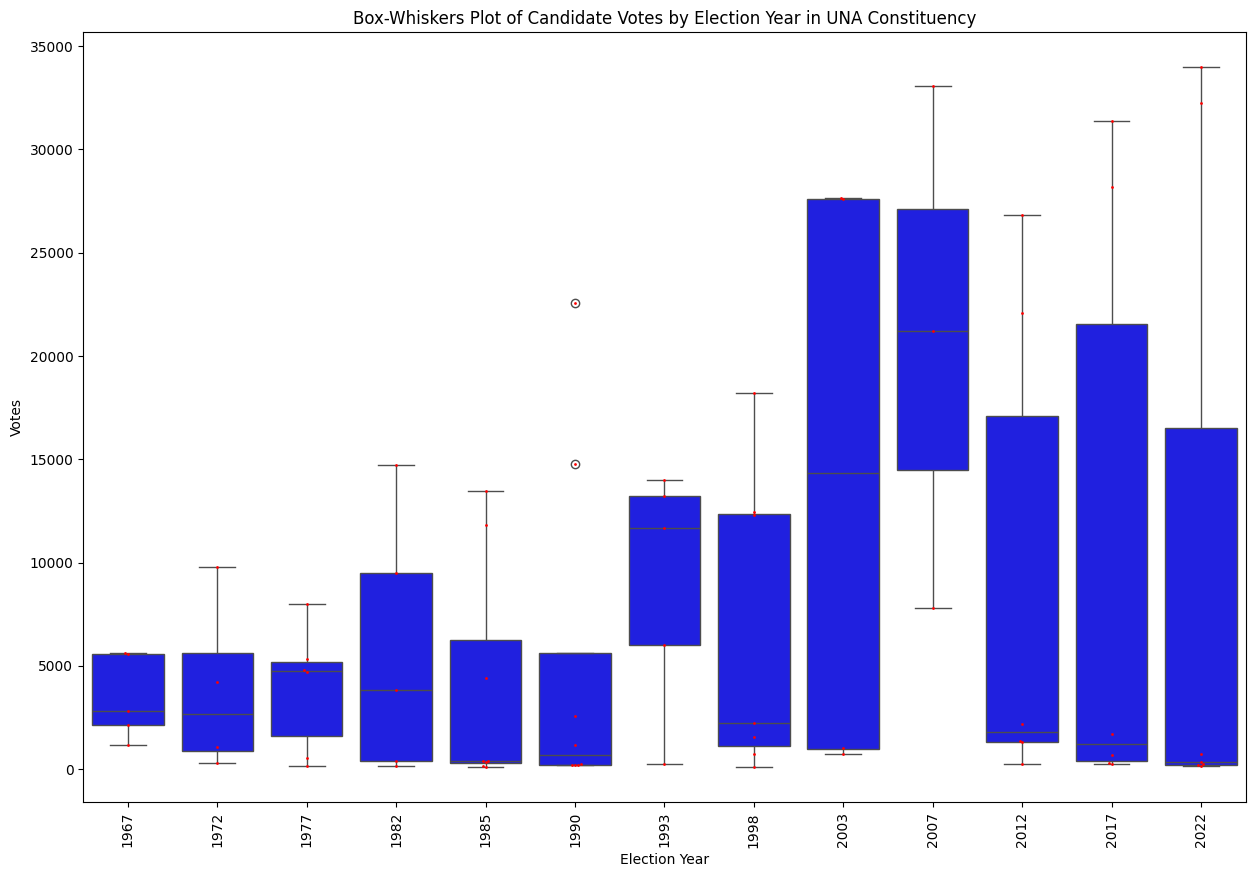

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for AC = UNA
una_df = combined_df[combined_df['AC'] == 'UNA']

# Ensure 'VOTES' column has no NaN/None/blank values
filtered_una_df = una_df[una_df['VOTES'].notna()]

# Create a box-whiskers plot
plt.figure(figsize=(15, 10))
box_plot = sns.boxplot(x='YEAR', y='VOTES', data=filtered_una_df, color='blue')
plt.title('Box-Whiskers Plot of Candidate Votes by Election Year in UNA Constituency')
plt.xlabel('Election Year')
plt.ylabel('Votes')
plt.xticks(rotation=90)

# Highlight outliers in a different color
sns.swarmplot(x='YEAR', y='VOTES', data=filtered_una_df, color='red', size=2)

plt.savefig('Q1/Chart.png')



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Save data cleanup strategy
with open('Q1/Data_Cleanup_Strategy.txt', 'w') as f:
    f.write("""
    Data Cleanup Strategy:
    1. Data Filtering:
        - Filtered the dataset to include only rows where 'AC' is 'UNA' and 'ST_NAME' is 'HIMACHAL PRADESH'.
        - Ensured that the 'VOTES' column has no NaN, None, blank, or null values. Only valid vote counts, including zero votes, were considered.

    2. Data Preparation for Plotting:
        - Prepared the dataframe 'filtered_una_df' with the columns 'YEAR' and 'VOTES' for plotting purposes.

    3. Visualization:
        - Used Seaborn's boxplot to create a box-whiskers plot of the candidate votes by election year for the UNA constituency.
        - Overlaid a swarm plot to highlight outliers in red, providing a clear visual distinction.

    Link to Google Colab Notebook:
    [Google Colab Notebook](https://colab.research.google.com/drive/1PPQbrmBN6Xmg2I2ucsleSmY7ibNpKWRS?usp=sharing)
    """)

# Save result inference
with open('Q1/Result_Inference.txt', 'w') as f:
    f.write("""
    Result Inference:

    plot description
                     The box-whiskers plot shows the distribution of candidate votes for each election year in Himachal Pradesh.
                     The blue boxes indicate the interquartile range (IQR) where the middle 50% of the votes lie.
                     The line inside each box represents the median vote count. Whiskers extend to the smallest and largest values within 1.5 times the IQR.
                     Outliers, highlighted in red, indicate candidates who received significantly different vote counts compared to others.

        OBSERVATIONS-Insights :

  Outliers:
-The outliers are marked with red circles above the whiskers in the plot.
-Significant outliers are observed in the years 1982, 1990, and 2003.

  Trend Over the Years:
-There is an overall increasing trend in the number of votes over the years.
-The spread of votes (interquartile range) increases significantly in later years, indicating higher competition or voter turnout.

  Whiskers and Interquartile Range (IQR):
-The length of the whiskers and the IQR increases over the years, showing more variability in the number of votes candidates receive.

  Median Votes:
-The median votes (indicated by the line within the box) also show an increasing trend over the years, with some fluctuations. """)


# **Q2**
 For the given state, Use a scatter plot to show the correlation between the length of a candidate name (string length) and the votes gathered by the candidate

<ipython-input-33-cc578b1d9896>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  una_df['NAME_LENGTH'] = una_df['CANDIDATE'].apply(lambda x: len(str(x)))


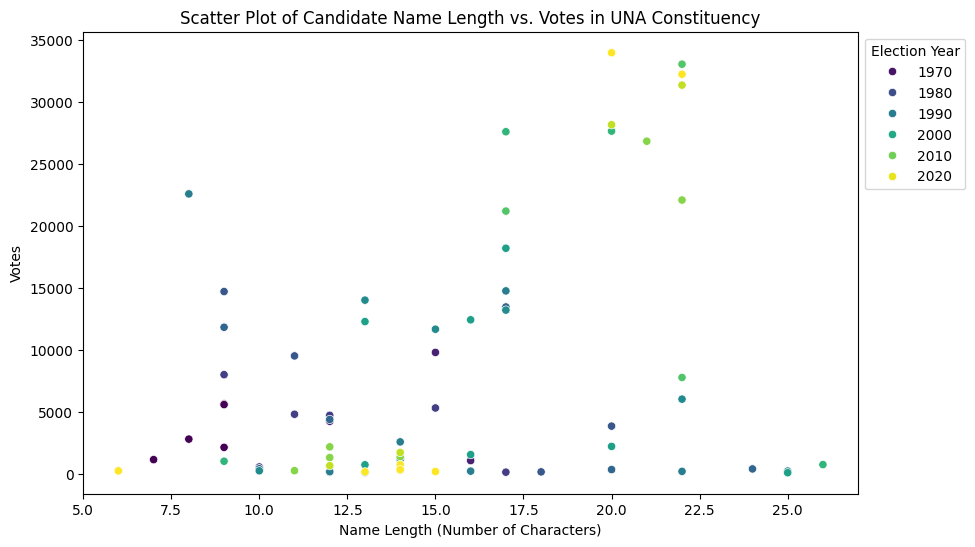

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is already filtered for Himachal Pradesh and stored in the variable combined_df

# Filter for AC = UNA
una_df = combined_df[combined_df['AC'] == 'UNA']

# Calculate the length of each candidate's name
una_df['NAME_LENGTH'] = una_df['CANDIDATE'].apply(lambda x: len(str(x)))

# Filter out any rows where candidate name or votes are missing
filtered_una_df = una_df[(una_df['CANDIDATE'].notna()) & (una_df['VOTES'].notna())]

# Create a scatter plot with different colors for each election year
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='NAME_LENGTH', y='VOTES', hue='YEAR', palette='viridis', data=filtered_una_df)
plt.title('Scatter Plot of Candidate Name Length vs. Votes in UNA Constituency')
plt.xlabel('Name Length (Number of Characters)')
plt.ylabel('Votes')
plt.legend(title='Election Year', bbox_to_anchor=(1, 1), loc='upper left')

# Save the plot
plt.savefig('Q2/Chart.png')

In [ ]:
# Save data cleanup strategy
with open('Q2/Data_Cleanup_Strategy.txt', 'w') as f:
    f.write("""
    Data Cleanup Strategy:
    1. Data Filtering:
        - Filtered the dataset to include only rows where 'AC' is 'UNA' and 'ST_NAME' is 'HIMACHAL PRADESH'.
        - Ensured that the 'CANDIDATE' and 'VOTES' columns have no NaN, None, blank, or null values. Only valid entries were considered.

    2. Data Preparation:
        - Calculated the length of each candidate's name and stored it in a new column 'NAME_LENGTH'.

    3. Visualization:
        - Created a scatter plot using Seaborn to visualize the correlation between candidate name length and the number of votes received in the UNA constituency.
        - Used different colors to represent different election years, making it easier to observe trends over time.

    Link to Google Colab Notebook:
    [Google Colab Notebook](https://colab.research.google.com/drive/1PPQbrmBN6Xmg2I2ucsleSmY7ibNpKWRS?usp=sharing)
    """)

# Save result inference
with open('Q2/Result_Inference.txt', 'w') as f:
    f.write("""
    Result Inference:

    plot description:

   Correlation Analysis:
        - The scatter plot displays the relationship between the length of candidate names and the number of votes they received in the UNA constituency.
        - Each point represents a candidate, with the x-axis showing the name length and the y-axis showing the number of votes.

   Color-Coding by Election Year:
        - Different colors are used to represent different election years, providing a clear visual distinction between data points from different years.
        - This helps in identifying any temporal trends or patterns in the data.


    OBSERVATIONS-Insights :


    Correlation:
-There does not appear to be a strong correlation between the length of a candidate's name and the number of votes they receive.
-The votes are widely dispersed across different name lengths.

    High Votes:
-Some candidates with both short (around 8-10 characters) and long names (around 15-20 characters) have received high votes.
-The highest votes are clustered around name lengths of 10-15 characters, but this does not imply a direct correlation.

   Color Indication:
-The different colors represent different election years, but there is no visible pattern that suggests a correlation between name length and votes across different years.

    Observations:
-Most candidates have name lengths between 10 to 15 characters.
-Votes less than 5,000 are spread across all name lengths, indicating that the name length does not significantly impact the lower range of votes.
   """)